<a href="https://colab.research.google.com/github/AI-Junction/Diabetic-Retinopathy/blob/master/DiabeticRetinopathy-V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check memory allocation to this sesssion

In [1]:
#%tensorflow_version 1.x

In [1]:
!pip install kaggle

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
#filename = "/.kaggle/kaggle.json"
filename = "kaggle.json"
#os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [4]:
!ls -lha kaggle.json



---x-wx--T 1 root root 65 Jan  6 06:37 kaggle.json


In [5]:
os.path.isdir("/root/.kaggle")

False

In [6]:
dir_kaggle = "/root/.kaggle"
if not os.path.isdir(dir_kaggle):
  !mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/
os.path.isdir(dir_kaggle)

True

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

Create training and test data in this allocated session of colaboratory

In [8]:
!mkdir '/content/Diabetic-Retinopathy'

In [9]:
!kaggle competitions files -c diabetic-retinopathy-detection

name                      size  creationDate         
------------------------  ----  -------------------  
train.zip.005              1GB  2018-06-27 06:04:12  
trainLabels.csv.zip       69KB  2018-06-27 06:04:12  
test.zip.007               3GB  2018-06-27 06:04:12  
test.zip.001               8GB  2018-06-27 06:04:12  
test.zip.004               8GB  2018-06-27 06:04:12  
test.zip.003               8GB  2018-06-27 06:04:12  
test.zip.005               8GB  2018-06-27 06:04:12  
train.zip.004              8GB  2018-06-27 06:04:12  
train.zip.001              8GB  2018-06-27 06:04:12  
sampleSubmission.csv.zip  82KB  2018-06-27 06:04:12  
test.zip.002               8GB  2018-06-27 06:04:12  
test.zip.006               8GB  2018-06-27 06:04:12  
train.zip.002              8GB  2018-06-27 06:04:12  
train.zip.003              8GB  2018-06-27 06:04:12  
sample.zip                10MB  2018-06-27 06:04:12  


In [10]:
if not os.path.isdir("/content/Diabetic-Retinopathy/train"):
  !mkdir "/content/Diabetic-Retinopathy/train"
#  !kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.001 -p "/content/Diabetic-Retinopathy/train"


In [11]:
#%%capture
if not os.path.isfile("/content/Diabetic-Retinopathy/train/train.zip.001"):
  !kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.001 -p "/content/Diabetic-Retinopathy/train"
  

if not os.path.isfile("/content/Diabetic-Retinopathy/train/train.zip.002"):
  !kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.002 -p "/content/Diabetic-Retinopathy/train"

if not os.path.isfile("/content/Diabetic-Retinopathy/train/train.zip.003"):
  !kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.003 -p "/content/Diabetic-Retinopathy/train"

if not os.path.isfile("/content/Diabetic-Retinopathy/train/train.zip.004"):
  !kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.004 -p "/content/Diabetic-Retinopathy/train"

if not os.path.isfile("/content/Diabetic-Retinopathy/train/train.zip.005"):
  !kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.005 -p "/content/Diabetic-Retinopathy/train"
  

100% 7.81G/7.81G [01:20<00:00, 79.4MB/s]
100% 7.81G/7.81G [01:20<00:00, 104MB/s] 
100% 7.79G/7.81G [01:31<00:00, 99.6MB/s]
100% 7.81G/7.81G [01:31<00:00, 91.6MB/s]
100% 7.81G/7.81G [01:31<00:00, 106MB/s]
100% 7.81G/7.81G [01:31<00:00, 91.2MB/s]
100% 7.81G/7.81G [01:31<00:00, 69.7MB/s]
100% 7.81G/7.81G [01:31<00:00, 92.0MB/s]
100% 1.33G/1.33G [00:14<00:00, 47.0MB/s]
100% 1.33G/1.33G [00:14<00:00, 102MB/s] 


In [12]:
!kaggle competitions download -c diabetic-retinopathy-detection -f trainLabels.csv.zip -p "/content/Diabetic-Retinopathy/"

  0% 0.00/69.4k [00:00<?, ?B/s]
100% 69.4k/69.4k [00:00<00:00, 63.4MB/s]


In [13]:
%%capture
!unzip "/content/Diabetic-Retinopathy/trainLabels.csv.zip" -d "/content/Diabetic-Retinopathy/"

In [14]:
!unzip '/content/Diabetic-Retinopathy/train/train.zip.001.zip' -d '/content/Diabetic-Retinopathy/train'
!unzip '/content/Diabetic-Retinopathy/train/train.zip.002.zip' -d '/content/Diabetic-Retinopathy/train'
!unzip '/content/Diabetic-Retinopathy/train/train.zip.003.zip' -d '/content/Diabetic-Retinopathy/train'
!unzip '/content/Diabetic-Retinopathy/train/train.zip.004.zip' -d '/content/Diabetic-Retinopathy/train'
!unzip '/content/Diabetic-Retinopathy/train/train.zip.005.zip' -d '/content/Diabetic-Retinopathy/train'

Archive:  /content/Diabetic-Retinopathy/train/train.zip.001.zip
  inflating: /content/Diabetic-Retinopathy/train/train.zip.001  
Archive:  /content/Diabetic-Retinopathy/train/train.zip.002.zip
  inflating: /content/Diabetic-Retinopathy/train/train.zip.002  
Archive:  /content/Diabetic-Retinopathy/train/train.zip.003.zip
  inflating: /content/Diabetic-Retinopathy/train/train.zip.003  
Archive:  /content/Diabetic-Retinopathy/train/train.zip.004.zip
  inflating: /content/Diabetic-Retinopathy/train/train.zip.004  
Archive:  /content/Diabetic-Retinopathy/train/train.zip.005.zip
  inflating: /content/Diabetic-Retinopathy/train/train.zip.005  


In [15]:
!rm '/content/Diabetic-Retinopathy/train/train.zip.001.zip'
!rm '/content/Diabetic-Retinopathy/train/train.zip.002.zip'
!rm '/content/Diabetic-Retinopathy/train/train.zip.003.zip'
!rm '/content/Diabetic-Retinopathy/train/train.zip.004.zip'
!rm '/content/Diabetic-Retinopathy/train/train.zip.005.zip'

In [16]:
!cat /content/Diabetic-Retinopathy/train/train.zip.* >train.zip
#!unzip train.zip

In [17]:
%%capture
!unzip '/content/train.zip' -d '/content/Diabetic-Retinopathy/train'

In [18]:
!rm '/content/train.zip'

In [19]:
print(os.path.isdir('/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy'))

True


In [20]:
!mkdir '/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test'

mkdir: cannot create directory ‘/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test’: File exists


In [21]:
import glob
tot_files = glob.glob('/content/Diabetic-Retinopathy/train/train/*')

In [22]:
print(len(tot_files))

35126


In [23]:
tot_files[:200]

['/content/Diabetic-Retinopathy/train/train/25776_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/43782_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/5156_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/12907_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/4624_right.jpeg',
 '/content/Diabetic-Retinopathy/train/train/14130_right.jpeg',
 '/content/Diabetic-Retinopathy/train/train/5255_right.jpeg',
 '/content/Diabetic-Retinopathy/train/train/42068_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/28698_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/8080_right.jpeg',
 '/content/Diabetic-Retinopathy/train/train/10562_right.jpeg',
 '/content/Diabetic-Retinopathy/train/train/40548_right.jpeg',
 '/content/Diabetic-Retinopathy/train/train/38155_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/21942_left.jpeg',
 '/content/Diabetic-Retinopathy/train/train/24592_right.jpeg',
 '/content/Diabetic-Retinopathy/train/train/28185_right.jpeg',
 '/c

In [24]:
!cp -r	 '/content/Diabetic-Retinopathy/train/train/6190_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/1524_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/39701_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24083_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/43416_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/36938_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/1093_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/31072_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/288_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/44237_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/7263_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/33591_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/23648_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/15848_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/29569_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/21367_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/40961_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/1049_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/22916_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/37556_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/19309_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/32110_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/8709_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/36220_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/2731_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/31924_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/39832_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/22082_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/22744_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/14300_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/21139_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/32324_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/18072_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/38166_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/7613_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/20777_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/31255_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/21961_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/5993_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/4904_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/25401_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/43684_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24711_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10726_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/15580_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/33206_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24137_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/16109_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/30144_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28058_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28236_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/22330_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/6883_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/31715_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/26332_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/32152_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/8907_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/8455_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/34463_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/27240_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/186_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/4857_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/36400_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/43148_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/39599_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/389_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/22392_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/30133_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/13328_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/30487_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/6514_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/18493_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/32125_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10297_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10666_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/25162_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/17276_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/37179_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/35073_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/25602_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/3592_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/3116_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/851_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/31891_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/1928_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/4732_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/1771_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/29390_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/40319_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/2695_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/39325_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/32089_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/21526_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24785_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28994_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/5938_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/1756_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/35967_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/36055_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24931_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/40385_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10996_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/38792_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/44328_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/35847_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/34997_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/36007_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/2918_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/12857_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/15546_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/12839_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/37963_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/18610_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/14833_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/17847_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/14598_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/13457_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/20865_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/30645_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10773_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/15366_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28713_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/8397_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/22535_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/11736_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/17571_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/4856_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/29565_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/32489_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/7727_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/26062_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/2236_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/30914_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/5646_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/14293_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/43929_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/36699_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/9156_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/30928_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/15276_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/17869_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/12128_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/35298_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10941_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/21092_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/32727_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/35311_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/34458_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/7976_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/18215_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/731_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/27278_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/33685_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/360_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/33281_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/35414_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/25346_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24974_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/17354_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28652_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/5577_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28801_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/18005_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/14366_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10438_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/20162_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/25041_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/682_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/12589_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24130_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/42865_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/24327_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/54_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/13522_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/17811_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/40619_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/22853_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/19970_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/4903_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/34373_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28970_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/7271_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/38172_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/25500_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/40675_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/39224_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/5922_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10078_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/34012_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/5559_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/23326_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/7088_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/28801_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/19163_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/5258_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/10854_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/44065_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/35388_right.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/23493_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'
!cp -r	 '/content/Diabetic-Retinopathy/train/train/36258_left.jpeg'	'/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'


In [25]:
!zip -r 'DRTestPics.zip' '/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/'

  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/ (stored 0%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/6190_right.jpeg (deflated 4%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/39701_right.jpeg (deflated 10%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/1524_right.jpeg (deflated 1%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/24083_right.jpeg (deflated 18%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/36938_right.jpeg (deflated 11%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/43416_right.jpeg (deflated 9%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/1093_right.jpeg (deflated 3%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/test/31072_right.jpeg (deflated 12%)
  adding: content/drive/My Drive/All ML Datasets/Diabetic-Retin

In [3]:
import os
import gzip
import json

import PIL

import numpy as np
import pandas as pd
import skimage
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 1000)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

from IPython.core.display import display, HTML, Image
from subprocess import check_output

In [4]:
df = pd.read_csv('/content/Diabetic-Retinopathy/trainLabels.csv')

In [5]:
print(df.shape)

(35126, 2)


In [6]:
def img_to_array(img):
    return np.array(img.getdata()).reshape(img.width, img.width, 3) / 255

In [7]:
def trim(im):
    """trim black margin, http://stackoverflow.com/questions/10615901/trim-whitespace-using-pil"""
    bg = PIL.Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = PIL.ImageChops.difference(im, bg)
    diff = PIL.ImageChops.add(diff, diff, 2.0, -20)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [8]:
def calc_thumbnail_size(img):
    """calculate thumbnail size with constant aspect ratio"""
    width, length = img.size
    ratio = width / length

    # for some reason, if it's exactly 224, then thumnailed image is 223
    dim = 224 + 1          # output dim
    if ratio > 1:
        size = (dim * ratio, dim)
    else:
        size = (dim, dim / ratio)
#     print(size)
    return size

In [9]:
def calc_crop_coords(img):
    """crop to square of desired dimension size"""
    dim = 224
    width, length = img.size
    left = 0
    right = width
    bottom = length
    top = 0
    if width > dim:
        delta = (width - dim) / 2
        left = delta
        right = width - delta
    if length > dim:
        delta = (length - dim) / 2
        top = delta
        bottom = length - delta
    return (left, top, right, bottom)

In [10]:
def preprocess(img):
    img = trim(img)
    tsize = calc_thumbnail_size(img)
    img.thumbnail(tsize)
    crop_coords = calc_crop_coords(img)
    img = img.crop(crop_coords)
    return img

In [11]:
df.level.value_counts().to_frame(name='count').T

0     2     1    3    4
count  25810  5292  2443  873  708

In [12]:
df = df.query('image in {0}'.format([_.replace('.jpeg', '') for _ in os.listdir('/content/Diabetic-Retinopathy/train/train')]))

In [13]:
df.head()

image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1

In [14]:
data_dir = '/content/Diabetic-Retinopathy/train/train'

In [15]:
PIL.__version__

'7.1.2'

[('/content/Diabetic-Retinopathy/train/train/16814_left.jpeg', 0), ('/content/Diabetic-Retinopathy/train/train/13784_right.jpeg', 0), ('/content/Diabetic-Retinopathy/train/train/39184_right.jpeg', 0), ('/content/Diabetic-Retinopathy/train/train/42365_left.jpeg', 0), ('/content/Diabetic-Retinopathy/train/train/24490_right.jpeg', 0)]
[('/content/Diabetic-Retinopathy/train/train/16341_right.jpeg', 1), ('/content/Diabetic-Retinopathy/train/train/16545_left.jpeg', 1), ('/content/Diabetic-Retinopathy/train/train/4864_left.jpeg', 1), ('/content/Diabetic-Retinopathy/train/train/5581_right.jpeg', 1), ('/content/Diabetic-Retinopathy/train/train/9619_right.jpeg', 1)]
[('/content/Diabetic-Retinopathy/train/train/857_left.jpeg', 2), ('/content/Diabetic-Retinopathy/train/train/30567_left.jpeg', 2), ('/content/Diabetic-Retinopathy/train/train/39106_right.jpeg', 2), ('/content/Diabetic-Retinopathy/train/train/27766_right.jpeg', 2), ('/content/Diabetic-Retinopathy/train/train/15120_left.jpeg', 2)]
[('/

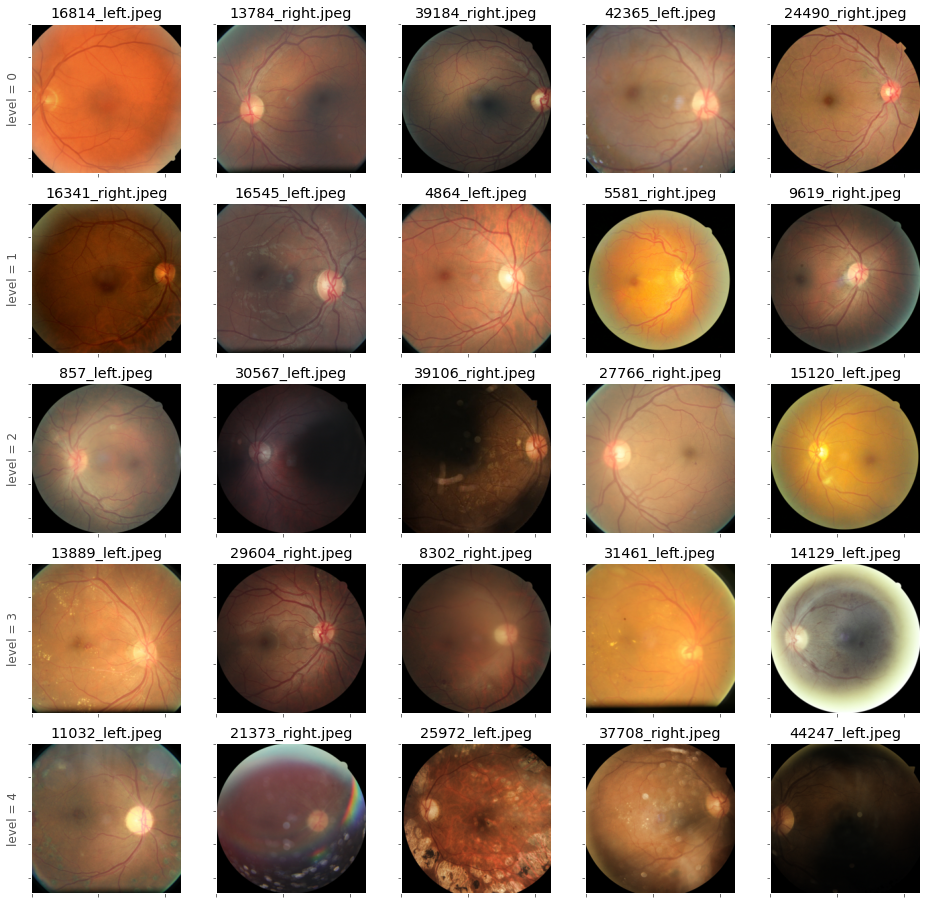

In [16]:
imgs_with_label = []
n_samples = 5
for i in range(5):
    _vals = df.query('level == {0}'.format(i)).sample(n_samples).image.apply(
        lambda v: (os.path.join(data_dir, v) + '.jpeg', i)).values.tolist()
    print(_vals)
    imgs_with_label.extend(_vals)

fig, axes = plt.subplots(5, 5, figsize=(16, 16))
axes = axes.ravel()
for k, (img, label) in enumerate(imgs_with_label):
    im = PIL.Image.open(img)
    im = preprocess(im)
    ax = axes[k]
    ax.imshow(img_to_array(im))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    if k % 5 == 0:
        ax.set_ylabel('level = {0}'.format(label))
    ax.set_title(os.path.basename(img))

In [17]:
df.columns

Index(['image', 'level'], dtype='object')

In [18]:
df.query('level == {0}'.format(1)).sample(3).image.apply(
        lambda v: (os.path.join(data_dir, v) + '.jpeg', 1)).values.tolist()

[('/content/Diabetic-Retinopathy/train/train/10085_right.jpeg', 1),
 ('/content/Diabetic-Retinopathy/train/train/38587_right.jpeg', 1),
 ('/content/Diabetic-Retinopathy/train/train/31537_left.jpeg', 1)]

In [19]:
#imgs_with_label.extend?

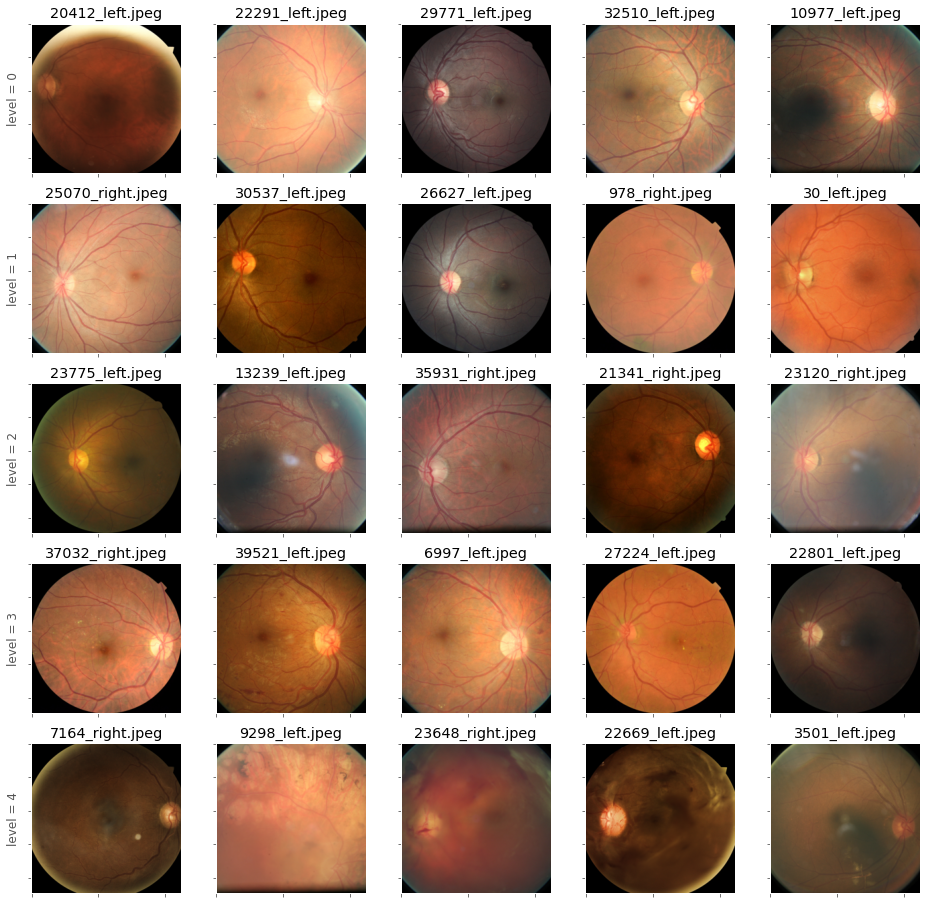

In [20]:
imgs_with_label = []
n_samples = 5
for i in range(5):
    _vals = df.query('level == {0}'.format(i)).sample(n_samples).image.apply(
        lambda v: (os.path.join(data_dir, v) + '.jpeg', i)).values.tolist()
    imgs_with_label.extend(_vals)

fig, axes = plt.subplots(5, 5, figsize=(16, 16))
axes = axes.ravel()
for k, (img, label) in enumerate(imgs_with_label):
    im = PIL.Image.open(img)
    im = preprocess(im)
    ax = axes[k]
    ax.imshow(img_to_array(im))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    if k % 5 == 0:
        ax.set_ylabel('level = {0}'.format(label))
    ax.set_title(os.path.basename(img))

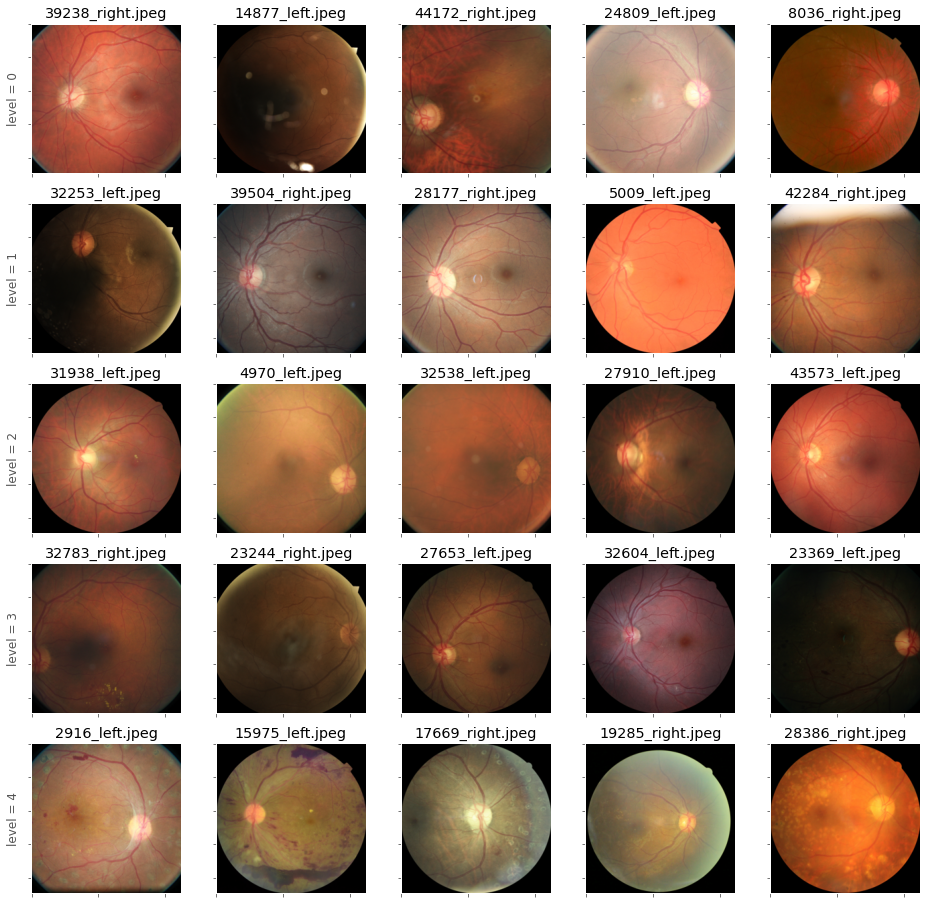

In [21]:
imgs_with_label = []
n_samples = 5
for i in range(5):
    _vals = df.query('level == {0}'.format(i)).sample(n_samples).image.apply(
        lambda v: (os.path.join(data_dir, v) + '.jpeg', i)).values.tolist()
    imgs_with_label.extend(_vals)

fig, axes = plt.subplots(5, 5, figsize=(16, 16))
axes = axes.ravel()
for k, (img, label) in enumerate(imgs_with_label):
    im = PIL.Image.open(img)
    im = preprocess(im)
    ax = axes[k]
    ax.imshow(img_to_array(im))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    if k % 5 == 0:
        ax.set_ylabel('level = {0}'.format(label))
    ax.set_title(os.path.basename(img))

In [22]:
base_image_dir = os.path.join('/content', 'Diabetic-Retinopathy', 'train', 'train')
retina_df = pd.read_csv('/content/Diabetic-Retinopathy/trainLabels.csv')
print(retina_df.shape)
print(base_image_dir)
print(retina_df['image'][:5])
retina_df['PatientId'] = retina_df['image'].map(lambda x: x.split('_')[0])
retina_df['path'] = retina_df['image'].map(lambda x: os.path.join(base_image_dir,
                                                         '{}.jpeg'.format(x)))
retina_df['exists'] = retina_df['path'].map(os.path.exists)
print(retina_df['exists'].sum(), 'images found of', retina_df.shape[0], 'total')
retina_df['eye'] = retina_df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)
from keras.utils.np_utils import to_categorical
retina_df['level_cat'] = retina_df['level'].map(lambda x: to_categorical(x, 1+retina_df['level'].max()))

retina_df.dropna(inplace = True)
retina_df = retina_df[retina_df['exists']]
retina_df.sample(3)

(35126, 2)
/content/Diabetic-Retinopathy/train/train
0     10_left
1    10_right
2     13_left
3    13_right
4     15_left
Name: image, dtype: object
35126 images found of 35126 total


image  level PatientId  \
25792   32634_left      0     32634   
34846   44023_left      0     44023   
24025  30352_right      0     30352   

                                                    path  exists  eye  \
25792  /content/Diabetic-Retinopathy/train/train/3263...    True    1   
34846  /content/Diabetic-Retinopathy/train/train/4402...    True    1   
24025  /content/Diabetic-Retinopathy/train/train/3035...    True    0   

                       level_cat  
25792  [1.0, 0.0, 0.0, 0.0, 0.0]  
34846  [1.0, 0.0, 0.0, 0.0, 0.0]  
24025  [1.0, 0.0, 0.0, 0.0, 0.0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4697b60890>,
      dtype=object)

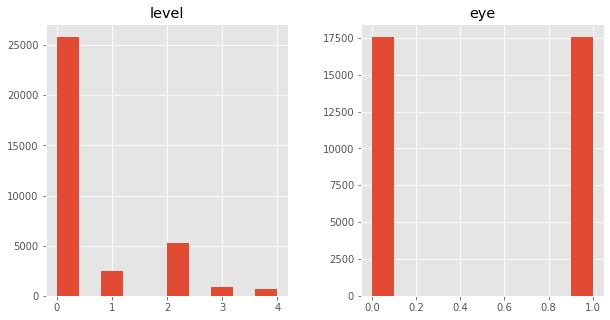

In [23]:
retina_df[['level', 'eye']].hist(figsize = (10, 5))

In [24]:
from sklearn.model_selection import train_test_split
rr_df = retina_df[['PatientId', 'level']].drop_duplicates()
train_ids, valid_ids = train_test_split(rr_df['PatientId'], 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = rr_df['level'])
raw_train_df = retina_df[retina_df['PatientId'].isin(train_ids)]
valid_df = retina_df[retina_df['PatientId'].isin(valid_ids)]
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])

train 27176 validation 9632


In [25]:
rr_df['level'].value_counts()

0    13655
2     3294
1     1843
3      566
4      445
Name: level, dtype: int64

In [26]:
train_df_tmp = raw_train_df.groupby(['level', 'eye']).apply(lambda x: x.sample(50, replace = True)).count()
train_df_tmp


image        500
level        500
PatientId    500
path         500
exists       500
eye          500
level_cat    500
dtype: int64

New Data Size: 750 Old Size: 27176


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4696bc4990>,
      dtype=object)

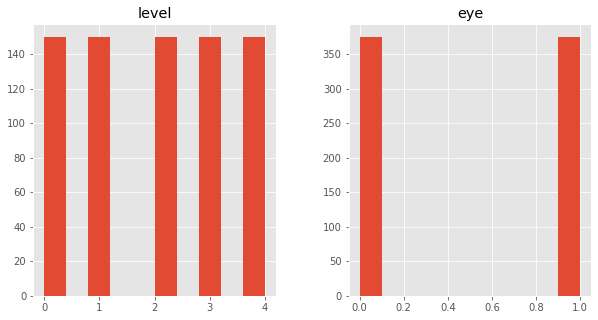

In [27]:
train_df = raw_train_df.groupby(['level', 'eye']).apply(lambda x: x.sample(75, replace = True)
                                                      ).reset_index(drop = True)
print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])
train_df[['level', 'eye']].hist(figsize = (10, 5))

In [28]:

!pip install -U tensorflow-addons

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import tensorflow_addons as tfa
os.environ['KERAS_BACKEND'] = 'theano' # 'tensorflow' as applicable
from keras import backend as K
from keras.applications.inception_v3 import preprocess_input
import numpy as np
IMG_SIZE = (512, 512) # slightly smaller than vgg16 normally expects
def tf_image_loader(out_size, 
                      horizontal_flip = True, 
                      vertical_flip = False, 
                     random_brightness = True,
                     random_contrast = True,
                    random_saturation = True,
                    random_hue = True,
                      color_mode = 'rgb',
                       preproc_func = preprocess_input,
                       on_batch = False):
    def _func(X):
        with tf.name_scope('image_augmentation'):
            with tf.name_scope('input'):
                X = tf.image.decode_png(tf.read_file(X), channels = 3 if color_mode == 'rgb' else 0)
                X = tf.image.resize_images(X, out_size)
            with tf.name_scope('augmentation'):
                if horizontal_flip:
                    X = tf.image.random_flip_left_right(X)
                if vertical_flip:
                    X = tf.image.random_flip_up_down(X)
                if random_brightness:
                    X = tf.image.random_brightness(X, max_delta = 0.1)
                if random_saturation:
                    X = tf.image.random_saturation(X, lower = 0.75, upper = 1.5)
                if random_hue:
                    X = tf.image.random_hue(X, max_delta = 0.15)
                if random_contrast:
                    X = tf.image.random_contrast(X, lower = 0.75, upper = 1.5)
                return preproc_func(X)
    if on_batch: 
        # we are meant to use it on a batch
        def _batch_func(X, y):
            return tf.map_fn(_func, X), y
        return _batch_func
    else:
        # we apply it to everything
        def _all_func(X, y):
            return _func(X), y         
        return _all_func
    
def tf_augmentor(out_size,
                intermediate_size = (640, 640),
                 intermediate_trans = 'crop',
                 batch_size = 16,
                   horizontal_flip = True, 
                  vertical_flip = False, 
                 random_brightness = True,
                 random_contrast = True,
                 random_saturation = True,
                    random_hue = True,
                  color_mode = 'rgb',
                   preproc_func = preprocess_input,
                   min_crop_percent = 0.001,
                   max_crop_percent = 0.005,
                   crop_probability = 0.5,
                   rotation_range = 10):
    
    load_ops = tf_image_loader(out_size = intermediate_size, 
                               horizontal_flip=horizontal_flip, 
                               vertical_flip=vertical_flip, 
                               random_brightness = random_brightness,
                               random_contrast = random_contrast,
                               random_saturation = random_saturation,
                               random_hue = random_hue,
                               color_mode = color_mode,
                               preproc_func = preproc_func,
                               on_batch=False)
    def batch_ops(X, y):
        batch_size = tf.shape(X)[0]
        with tf.name_scope('transformation'):
            # code borrowed from https://becominghuman.ai/data-augmentation-on-gpu-in-tensorflow-13d14ecf2b19
            # The list of affine transformations that our image will go under.
            # Every element is Nx8 tensor, where N is a batch size.
            transforms = []
            identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)
            if rotation_range > 0:
                angle_rad = rotation_range / 180 * np.pi
                angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
                #transforms += [tf.contrib.image.angles_to_projective_transforms(angles, intermediate_size[0], intermediate_size[1])]
                transforms += [tfa.image.angles_to_projective_transforms(angles, intermediate_size[0], intermediate_size[1])]

            if crop_probability > 0:
                crop_pct = tf.random_uniform([batch_size], min_crop_percent, max_crop_percent)
                left = tf.random_uniform([batch_size], 0, intermediate_size[0] * (1.0 - crop_pct))
                top = tf.random_uniform([batch_size], 0, intermediate_size[1] * (1.0 - crop_pct))
                crop_transform = tf.stack([
                      crop_pct,
                      tf.zeros([batch_size]), top,
                      tf.zeros([batch_size]), crop_pct, left,
                      tf.zeros([batch_size]),
                      tf.zeros([batch_size])
                  ], 1)
                coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), crop_probability)
                transforms += [tf.where(coin, crop_transform, tf.tile(tf.expand_dims(identity, 0), [batch_size, 1]))]
            #if len(transforms)>0:
            #    X = tfa.image.transform(X,
            #          tfa.image.compose_transforms(*transforms),
            #          interpolation='BILINEAR') # or 'NEAREST'
            if intermediate_trans=='scale':
                X = tf.image.resize_images(X, out_size)
            elif intermediate_trans=='crop':
                X = tf.image.resize_image_with_crop_or_pad(X, out_size[0], out_size[1])
            else:
                raise ValueError('Invalid Operation {}'.format(intermediate_trans))
            return X, y
    def _create_pipeline(in_ds):
        batch_ds = in_ds.map(load_ops, num_parallel_calls=4).batch(batch_size)
        return batch_ds.map(batch_ops)
    return _create_pipeline

Instructions for updating:
non-resource variables are not supported in the long term


In [29]:
def flow_from_dataframe(idg, 
                        in_df, 
                        path_col,
                        y_col, 
                        shuffle = True, 
                        color_mode = 'rgb'):
    files_ds = tf.data.Dataset.from_tensor_slices((in_df[path_col].values, 
                                                   np.stack(in_df[y_col].values,0)))
    in_len = in_df[path_col].values.shape[0]
    while True:
        if shuffle:
            files_ds = files_ds.shuffle(in_len) # shuffle the whole dataset
        
        next_batch = idg(files_ds).repeat().make_one_shot_iterator().get_next()
        for i in range(max(in_len//32,1)):
            # NOTE: if we loop here it is 'thread-safe-ish' if we loop on the outside it is completely unsafe
            yield K.get_session().run(next_batch)

In [30]:
batch_size = 48
core_idg = tf_augmentor(out_size = IMG_SIZE, 
                        color_mode = 'rgb', 
                        vertical_flip = True,
                        crop_probability=0.0, # crop doesn't work yet
                        batch_size = batch_size) 
valid_idg = tf_augmentor(out_size = IMG_SIZE, color_mode = 'rgb', 
                         crop_probability=0.0, 
                         horizontal_flip = False, 
                         vertical_flip = False, 
                         random_brightness = False,
                         random_contrast = False,
                         random_saturation = False,
                         random_hue = False,
                         rotation_range = 0,
                        batch_size = batch_size)

train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'level_cat')

valid_gen = flow_from_dataframe(valid_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'level_cat') # we can use much larger batches for evaluation

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


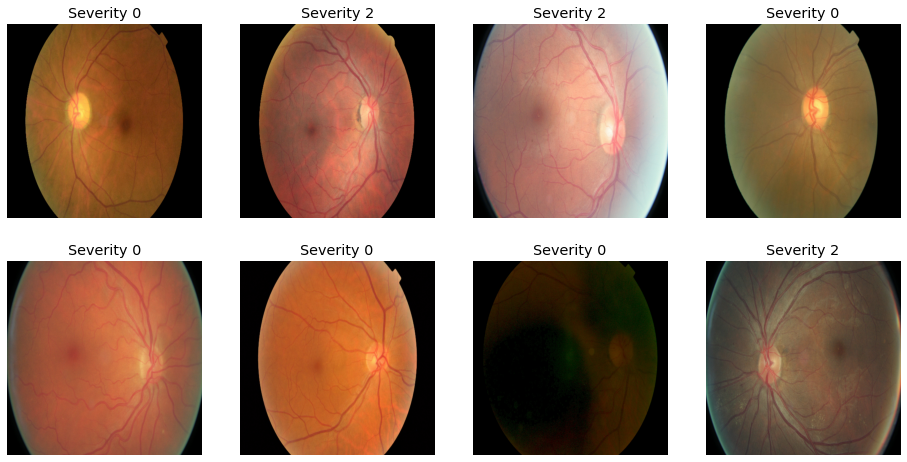

In [31]:
#print(next(valid_gen, None))
t_x, t_y = next(valid_gen)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x*127+127, 0, 255).astype(np.uint8))
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

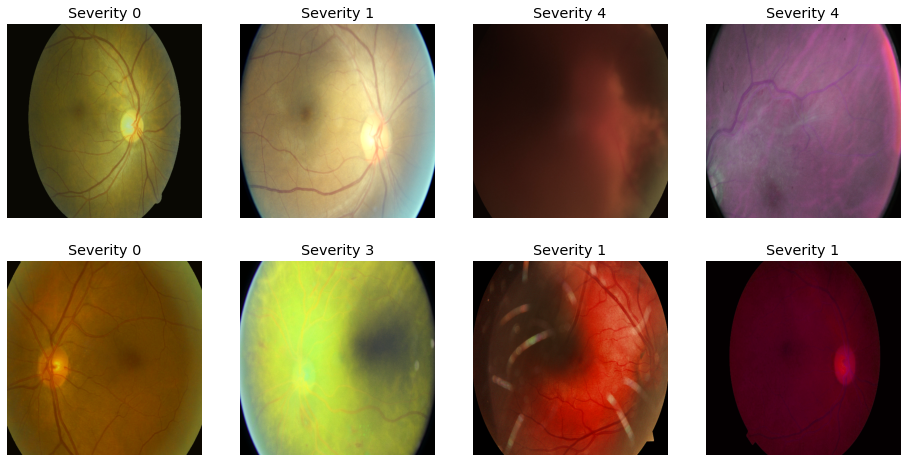

In [32]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x*127+127, 0, 255).astype(np.uint8))
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

In [33]:
from keras.applications.vgg16 import VGG16 as PTModel
from keras.applications.inception_resnet_v2 import InceptionResNetV2 as PTModel
from keras.applications.inception_v3 import InceptionV3 as PTModel
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
in_lay = Input(t_x.shape[1:])
print (t_x.shape[1:])
base_pretrained_model = PTModel(input_shape =  t_x.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
print(base_pretrained_model.get_output_shape_at)
#model(tf.keras.Input((810, 1440, 3)))
pt_features = base_pretrained_model(in_lay)
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

(512, 512, 3)
Instructions for updating:
Colocations handled automatically by placer.
<bound method Layer.get_output_shape_at of <keras.engine.functional.Functional object at 0x7f4695c37810>>


In [34]:
# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(Dropout(0.5)(bn_features))
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(8, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1, 
                    kernel_size = (1,1), 
                    padding = 'valid', 
                    activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.25)(gap)
dr_steps = Dropout(0.25)(Dense(128, activation = 'relu')(gap_dr))
out_layer = Dense(t_y.shape[-1], activation = 'softmax')(dr_steps)
retina_model = Model(inputs = [in_lay], outputs = [out_layer])
from keras.metrics import top_k_categorical_accuracy
def top_2_accuracy(in_gt, in_pred):
    return top_k_categorical_accuracy(in_gt, in_pred, k=2)

retina_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['categorical_accuracy', top_2_accuracy])
retina_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, 14, 14, 2048  21802784    ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 14, 14, 2048  8192       ['inception_v3[0][0]']           
 ormalization)                  )                                                             

In [35]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('retina')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=6) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [36]:
retina_model.fit_generator(train_gen, 
                           steps_per_epoch = train_df.shape[0]//batch_size,
                           validation_data = valid_gen, 
                           validation_steps = valid_df.shape[0]//batch_size,
                              epochs = 1, 
                              #epochs = 25, 
                              callbacks = callbacks_list,
                             workers = 0, # tf-generators are not thread-safe
                             use_multiprocessing=False, 
                             max_queue_size = 0
                            )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


15/15 [==============================] - ETA: 0s - batch: 7.0000 - size: 46.8000 - loss: 1.5752 - categorical_accuracy: 0.2721 - top_2_accuracy: 0.5028

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 00001: val_loss improved from inf to 1.37127, saving model to retina_weights.best.hdf5
15/15 [==============================] - 385s 26s/step - batch: 7.0000 - size: 46.8000 - loss: 1.5754 - categorical_accuracy: 0.2721 - top_2_accuracy: 0.5028 - val_loss: 1.3713 - val_categorical_accuracy: 0.1874 - val_top_2_accuracy: 0.8591 - lr: 0.0010


In [37]:
# load the best version of the model
#retina_model.load_weights(weight_path)
retina_model.save('full_retina_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [38]:
!cp -r '/content/full_retina_model.h5' '/content/drive/My Drive/All ML Datasets/Diabetic-Retinopathy/full_retina_model.h5'

In [39]:
from keras.models import load_model
#If you load model only for prediction (without training), you need to set compile flag to `False`:
new_model = load_model('full_retina_model.h5', compile=False)
new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, 14, 14, 2048  21802784    ['input_1[0][0]']                
                                )    

In [40]:
'''
valid_gen = flow_from_dataframe(valid_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'level_cat') # we can use much larger batches for evaluation
'''                            

"\nvalid_gen = flow_from_dataframe(valid_idg, valid_df, \n                             path_col = 'path',\n                            y_col = 'level_cat') # we can use much larger batches for evaluation\n"

In [41]:
##### create one fixed dataset for evaluating
from tqdm import tqdm_notebook
# fresh valid gen
valid_gen = flow_from_dataframe(valid_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'level_cat') 
vbatch_count = (valid_df.shape[0]//batch_size-1)
out_size = vbatch_count*batch_size

In [42]:
print(out_size)

9552


In [43]:
print((out_size,)+t_x.shape[1:])

(9552, 512, 512, 3)


In [44]:
test_X = np.zeros((1500,)+t_x.shape[1:], dtype = np.float32)
test_Y = np.zeros((1500,)+t_y.shape[1:], dtype = np.float32)

In [45]:
print(out_size)

9552


In [46]:
# not using full out_size due to RAM limitations
#test_X = np.zeros((out_size,)+t_x.shape[1:], dtype = np.float32)
#test_Y = np.zeros((out_size,)+t_y.shape[1:], dtype = np.float32)

In [47]:
print(range(vbatch_count))
print(batch_size)

range(0, 199)
48


In [49]:
print(range(vbatch_count))

range(0, 199)


In [50]:
vbatch_count = 29

In [51]:

#for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)), 
#                         valid_gen):
for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)), 
                         valid_gen):

    #print(i, c_x, c_y)
    j = i*batch_size
    print ("j: ", j)
    print ("c_x: ", c_x.shape)
    print ("c_y: ", c_y.shape)
    print ("test_X: ", test_X.shape)
    print ("test_Y: ", test_Y.shape)
    test_X[j:(j+c_x.shape[0])] = c_x
    #test_Y[j:(j+c_x.shape[0])] = c_y
    test_Y[j:(j+c_y.shape[0])] = c_y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/29 [00:00<?, ?it/s]

j:  0
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  48
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  96
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  144
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  192
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  240
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  288
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  336
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  384
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  432
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 512, 512, 3)
test_Y:  (1500, 5)
j:  480
c_x:  (48, 512, 512, 3)
c_y:  (48, 5)
test_X:  (1500, 51

In [52]:
print(test_X.shape, test_Y.shape)

(1500, 512, 512, 3) (1500, 5)


In [53]:
# get the attention layer since it is the only one with a single output dim
#for attn_layer in retina_model.layers:
for attn_layer in new_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

In [55]:
# commented this cell as we will be using new_model instead of retina_model
import keras.backend as K
rand_idx = np.random.choice(range(len(test_X)), size = 6)
attn_func = K.function(inputs = [retina_model.get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(np.clip(cur_img[0,:,:,:]*127+127, 0, 255).astype(np.uint8))
    attn_ax.imshow(attn_img[0, :, :, 0]/attn_img[0, :, :, 0].max(), cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    real_cat = np.argmax(test_Y[c_idx, :])
    img_ax.set_title('Eye Image\nCat:%2d' % (real_cat))
    #pred_cat = retina_model.predict(cur_img)
    pred_cat = new_model.predict(cur_img)
    attn_ax.set_title('Attention Map\nPred:%2.2f%%' % (100*pred_cat[0,real_cat]))
fig.savefig('attention_map.png', dpi = 300)


RuntimeError: ignored

In [72]:
#new_model.summary()
new_model.layers[0].get_input_at(0)

<tf.Tensor 'input_1_1:0' shape=(?, 512, 512, 3) dtype=float32>

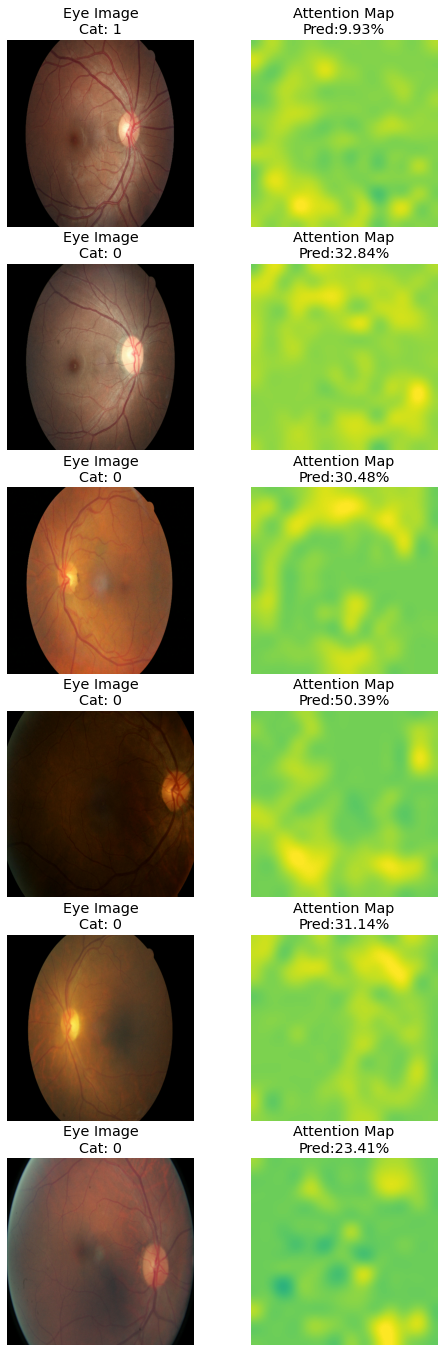

In [76]:
# using new_model instead of retina_model

import keras.backend as K
rand_idx = np.random.choice(range(len(test_X)), size = 6)
attn_func = K.function(inputs = [new_model.layers[0].get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(np.clip(cur_img[0,:,:,:]*127+127, 0, 255).astype(np.uint8))
    attn_ax.imshow(attn_img[0, :, :, 0]/attn_img[0, :, :, 0].max(), cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    real_cat = np.argmax(test_Y[c_idx, :])
    img_ax.set_title('Eye Image\nCat:%2d' % (real_cat))
    #pred_cat = retina_model.predict(cur_img)
    pred_cat = new_model.predict(cur_img)
    attn_ax.set_title('Attention Map\nPred:%2.2f%%' % (100*pred_cat[0,real_cat]))
fig.savefig('attention_map.png', dpi = 300)

In [ ]:
'''
# commented this cell as we will be using new_model instead of retina_model
from sklearn.metrics import accuracy_score, classification_report
pred_Y = retina_model.predict(test_X, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)
test_Y_cat = np.argmax(test_Y, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat))
'''

In [ ]:
# using new_model instead of retina_model

from sklearn.metrics import accuracy_score, classification_report
pred_Y = new_model.predict(test_X, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)
test_Y_cat = np.argmax(test_Y, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_Y_cat, pred_Y_cat), 
            annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues, vmax = test_X.shape[0]//16)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
sick_vec = test_Y_cat>0
sick_score = np.sum(pred_Y[:,1:],1)
fpr, tpr, _ = roc_curve(sick_vec, sick_score)
fig, ax1 = plt.subplots(1,1, figsize = (6, 6), dpi = 150)
ax1.plot(fpr, tpr, 'b.-', label = 'Model Prediction (AUC: %2.2f)' % roc_auc_score(sick_vec, sick_score))
ax1.plot(fpr, fpr, 'g-', label = 'Random Guessing')
ax1.legend()
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');

In [ ]:
fig, m_axs = plt.subplots(2, 4, figsize = (32, 20))
for (idx, c_ax) in enumerate(m_axs.flatten()):
    c_ax.imshow(np.clip(test_X[idx]*127+127,0 , 255).astype(np.uint8), cmap = 'bone')
    c_ax.set_title('Actual Severity: {}\n{}'.format(test_Y_cat[idx], 
                                                           '\n'.join(['Predicted %02d (%04.1f%%): %s' % (k, 100*v, '*'*int(10*v)) for k, v in sorted(enumerate(pred_Y[idx]), key = lambda x: -1*x[1])])), loc='left')
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png', dpi = 300)

In [ ]:
if not os.path.isfile("/content/Pneumonia-Detection/stage_2_test_images.zip"):
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_detailed_class_info.csv -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_sample_submission.csv -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_train_labels.csv -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_test_images.zip -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_train_images.zip -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f GCP Credits Request Link - RSNA.txt -p "/content/Pneumonia-Detection/"


In [ ]:
!pip install pydicom

In [ ]:
if not os.path.isdir("/content/Pneumonia-Detection/train"):
  !mkdir "/content/Pneumonia-Detection/train"
  !unzip "/content/Pneumonia-Detection/stage_2_train_images.zip" -d "/content/Pneumonia-Detection/train"


In [ ]:
if not os.path.isdir("/content/Pneumonia-Detection/test"):
  !mkdir "/content/Pneumonia-Detection/test"
  !unzip "/content/Pneumonia-Detection/stage_2_test_images.zip" -d "/content/Pneumonia-Detection/test"


In [ ]:
if not os.path.isfile("/content/Pneumonia-Detection/stage_2_detailed_class_info.csv"):
  !unzip "/content/Pneumonia-Detection/stage_2_detailed_class_info.csv.zip" -d "/content/Pneumonia-Detection"


In [ ]:
if not os.path.isfile("/content/Pneumonia-Detection/stage_2_train_labels.csv"):
  !unzip "/content/Pneumonia-Detection/stage_2_train_labels.csv.zip" -d "/content/Pneumonia-Detection"


In [ ]:
import os
import csv
import random
import pydicom
import numpy as np
import pandas as pd
from skimage import io
from skimage import measure
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [ ]:
df_train_labels = pd.read_csv('/content/Pneumonia-Detection/stage_2_train_labels.csv')

In [ ]:
print(df_train_labels.shape)
print(df_train_labels.columns)
print(df_train_labels.head())

In [ ]:
df_train = df_train_labels.drop_duplicates('patientId')

In [ ]:
x = df_train_labels[df_train_labels['patientId']=='cb4de6ed-efda-429e-941e-650cf9f6e33d']

In [ ]:
print(x)

In [ ]:
print(os.path.isfile('/content/Pneumonia-Detection/train/'+'cb4de6ed-efda-429e-941e-650cf9f6e33d.dcm'))

In [ ]:
# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join('/content/Pneumonia-Detection/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        #print(filename)
        if os.path.isfile('/content/Pneumonia-Detection/train/'+filename+'.dcm'):
          #print("file is present ", filename)
          location = rows[1:5]
          pneumonia = rows[5]
          # if row contains pneumonia add label to dictionary
          # which contains a list of pneumonia locations per filename
          if pneumonia == '1':
              # convert string to float to int
              location = [int(float(i)) for i in location]
              # save pneumonia location in dictionary
              if filename in pneumonia_locations:
                  pneumonia_locations[filename].append(location)
              else:
                  pneumonia_locations[filename] = [location]
        else:
          print("file not present ", filename)

In [ ]:
print(len(filenames))

In [ ]:
print(len(pneumonia_locations))

In [ ]:
# load and shuffle filenames
folder = '/content/Pneumonia-Detection/train'
filenames = os.listdir(folder)
random.shuffle(filenames)
print(len(filenames))

In [ ]:
print(len(filenames))

In [ ]:
# split into train and validation filenames
n_valid_samples = 2560
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

In [ ]:
print('Total train images:',len(filenames))
print('Images with pneumonia:', len(pneumonia_locations))

ns = [len(value) for value in pneumonia_locations.values()]
plt.figure()
plt.hist(ns)
plt.xlabel('Pneumonia per image')
plt.xticks(range(1, np.max(ns)+1))
plt.show()

heatmap = np.zeros((1024, 1024))
ws = []
hs = []
for values in pneumonia_locations.values():
    for value in values:
        x, y, w, h = value
        heatmap[y:y+h, x:x+w] += 1
        ws.append(w)
        hs.append(h)
plt.figure()
plt.title('Pneumonia location heatmap')
plt.imshow(heatmap)
plt.figure()
plt.title('Pneumonia height lengths')
plt.hist(hs, bins=np.linspace(0,1000,50))
plt.show()
plt.figure()
plt.title('Pneumonia width lengths')
plt.hist(ws, bins=np.linspace(0,1000,50))
plt.show()
print('Minimum pneumonia height:', np.min(hs))
print('Minimum pneumonia width: ', np.min(ws))

In [ ]:
class generator(keras.utils.Sequence):
    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [ ]:
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
os.path.isfile('/content/train/cb4de6ed-efda-429e-941e-650cf9f6e33d.dcm')

In [ ]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

# create network and compiler
model = create_network(input_size=256, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.001
    epochs = 2
    return lr*(np.cos(np.pi*x/epochs)+1.)/2
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = '/content/Pneumonia-Detection/train'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=32, image_size=256, shuffle=True, augment=True, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=32, image_size=256, shuffle=False, predict=False)

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=2, workers=4, use_multiprocessing=True)

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["acc"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_acc"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

In [ ]:
for imgs, msks in valid_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))
    axarr = axarr.ravel()
    axidx = 0
    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        # plot image
        axarr[axidx].imshow(img[:, :, 0])
        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='b',facecolor='none'))
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break

In [ ]:
# load and shuffle filenames
folder = '/content/Pneumonia-Detection/test'
test_filenames = os.listdir(folder)
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=25, image_size=256, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission.csv')